<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Logistic Regression
This is looking at which hyperparemeters produce higher accuracices and their effect on things such as training time and testing time
Hyperparameters for multinominal logistic regression are things such as:
*  Which algorithm to use in the optimization problem
*  The regularization strength
*  The tolerance for stopping criterea
*  Which type of penalty to use


# Downgrade tensorflow
This allows us to import and read the MNIST dataset using tensorflow.

In [ ]:
pip install tensorflow==1.14

# Import the requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Read the MNIST dataset

In [ ]:
# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

# Train

In [ ]:
clf = LogisticRegression(
    multi_class = 'multinomial',
    solver = 'newton-cg',
    penalty = 'l2',
    tol = 1e-4,
    C = 0.5,
)

# Train on the entire dataset
print('Train model clf', )
clf.fit(train_images,train_labels)
print('Training complete')

Train model clf
Training complete


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


# Predict

In [ ]:
# Test on 10000 images:
test_x = test_images[:10000]
expected = test_labels[:10000].tolist()

print("Compute predictions")
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))

# see how the model performed on each digit
print("Classification Report: ")
classification_report(expected, predicted)
print("Confusion Matrix: ")
confusion_matrix(expected, predicted)

Compute predictions
Accuracy:  0.9279
Classification Report: 
Confusion Matrix: 


array([[ 961,    0,    1,    3,    0,    7,    4,    3,    1,    0],
       [   0, 1114,    3,    1,    0,    1,    3,    2,   11,    0],
       [   5,    8,  932,   12,    9,    3,   15,    9,   36,    3],
       [   4,    1,   17,  922,    0,   25,    3,   10,   21,    7],
       [   1,    3,    6,    3,  919,    0,    9,    4,    6,   31],
       [   9,    2,    2,   37,    9,  775,   15,    8,   31,    4],
       [   8,    3,    5,    3,    6,   15,  915,    2,    1,    0],
       [   1,    8,   20,    8,    6,    1,    0,  953,    3,   28],
       [   9,   11,    6,   21,    8,   26,   12,    8,  863,   10],
       [  10,    8,    1,    8,   22,    6,    0,   21,    8,  925]])

# Prediction example
Set image_index equal to any value between 1 and 10,000 i.e. the test dataset.

8


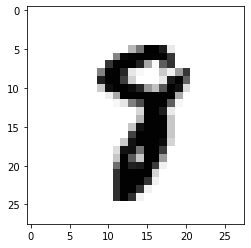

In [ ]:
# select image index from test dataset
image_index = 435

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = clf.predict(test_x[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print(pred)